# Scientific Bootcamp Day 1
From: https://github.com/Hekstra-Lab/scientific-python-bootcamp  
Written by:  Ian Hunt-Isaak (ianhuntisaak@g.harvard.edu) February 2020


1. How to get the most out of this bootcamp
2. Structure of bootcamp
3. Topics to come
4. Start!



## Outline
The focus of this day is to learn the basic language of scientific computing, working with numpy arrays. Building all the low-level skills that we feel are necessary for interacting with real world problems.

-   Installing python libraries

-   Basic of working in Jupyter notebooks

-   Working with arrays of data (bulk of the day is this)

-   Basic plotting

-   How to troubleshoot

-   Finish with simulating a random walk, plotting the trajectory


<img src="images/2d_walk.png" width="75%">


# Working in Jupyter notebooks
- Tool bar on the left
- Markdown cells
    - How to make new lines
    - Writing math with $\LaTeX$: $i\hbar\frac{\partial}{\partial t}\left|\Psi(t)\right>=H\left|\Psi(t)\right>$
    - Images   
    
     <img src="images/2d_walk.png" width="40%">

- Select keyboard shortcuts
    - Indenting crtl-[ or crtl-]  
    - Shift tab
    - Cell commands 
    
    
### Useful resources:    
[Jupyterlab UI documentation (actually helpful!)](https://jupyterlab.readthedocs.io/en/stable/user/interface.html)  
[Jupyter shortcuts and other tips](https://yoursdata.net/jupyter-lab-shortcut-and-magic-functions-tips/)  
[LATEX Math for Undergrads](http://tug.ctan.org/info/undergradmath/undergradmath.pdf)

# Super basic plotting


https://matplotlib.org/3.1.1/tutorials/index.html  
Matplotlib documentation is often opaque, the best resources are generally found by googling: "how do I plot ___ in python" and finding a good stackoverflow answer   
Ian also likes the book [Mastering Matplotlib](https://www.amazon.com/Mastering-matplotlib-Duncan-M-McGreggor/dp/1783987545) (availiable for free through Hollis!)   
Specifying colors: https://matplotlib.org/tutorials/colors/colors.html  
Good reference: https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html


In [2]:
import matplotlib.pyplot as plt

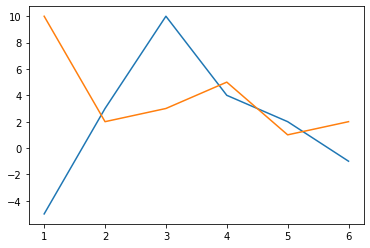

In [313]:
x = [1,2,3,4,5,6]
y1 = [-5,3,10,4,2,-1]
y2 = [10,2,3,5,1,2]
plt.plot(x,y1)#,color='tab:blue')

plt.plot(x,y2)

plt.show()

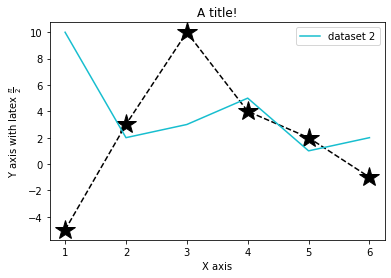

In [314]:
plt.plot(x,y1,'*--',color='black',markersize=20)

plt.plot(x,y2,color='tab:cyan',label='dataset 2')
plt.xlabel('X axis')
plt.ylabel(r'Y axis with latex $\frac{\pi}{2}$')
plt.title('A title!')
plt.legend() # if you don't run this then the legend won't appear
plt.show()

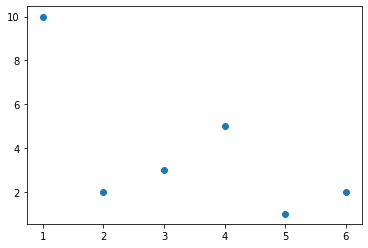

In [315]:
plt.scatter(x,y2)

# Dealing with errors

1. Read the last line of the error
2. Copy the error description to google
    - Can help to add key terms like "matplotlib" or "python"
  
3. Ask a friend to look at it
4. Ask a question on stackoverflow
    - Make sure you ask the question effectively! Follow these guidelines: https://stackoverflow.com/help/minimal-reproducible-example

ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

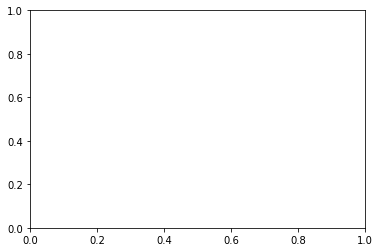

In [8]:
x = [3,4,5,6,7]
y1 = [3,4,2,34]
y2 = [5,3,5,6,8]
if y1[0] < 10:
    plt.plot(x,y1)
else:
    plt.plot(x,y2)

## Exercises - Fixing Errors

With a partner or small group fix the code in the next four cells so they all run without giving an error.  Feel free to google the error messages, but always think about what they mean first.

### Print out the last element of L

In [7]:
L = [3,4,16,23]
L[4]

IndexError: list index out of range

### For each value x in L print out $x^3 - 2\cdot(x-3)$

In [8]:
for x in L:
    print(x**3-2*(x-3)

SyntaxError: unexpected EOF while parsing (<ipython-input-8-d90c7192e221>, line 2)

### Using the pythag_triples list print confirm that the first triple is correct. I.e. show that $3^2 + 4^2 = 5^2$

Hint: Try break the math onto several lines to isolate the error

In [9]:
pythag_triples = [[3,4,5],[5,12,13],[7,24,25],[8,15,17]]
3**2 + pythag_triples[1]**2 == pythag_triples[2]**2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

### plot y as a function of x

This will give one of the most common matplotlib errors

ValueError: x and y must have same first dimension, but have shapes (5,) and (6,)

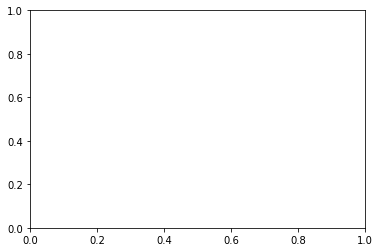

In [12]:
x = [1, 2, 3, 4,5]
y = [20,4,5,6,7,8]
plt.plot(x,y)
plt.show()

## End exercises - If you're done help some who isn't

# Numpy

### What are NumPy Arrays

Basically multidimensional lists. Very fast for doing math!


In [316]:
import numpy as np
from math import sin

In [317]:
N =1000000

arr_list = list(range(N))

In [318]:
%%timeit
for i in range(len(arr_list)):
    sin(arr_list[i])

100 ms ± 10.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [319]:

arr_np = np.arange(N)


In [320]:
%%timeit
np.sin(arr_np)


12.8 ms ± 504 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



# How to create arrays

**From a list**: we can just call np.array(list) to turn that list into a numpy array. But be careful the lists need to be shaped like a valid matrix.


In [321]:
good_list = [[ 1., 2., 3.],
            [ 4., 5.,6. ]]

bad_list = [[ 1., 2., 3.],
            [ 4., 5.]]

print(good_list)
print(bad_list)

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]
[[1.0, 2.0, 3.0], [4.0, 5.0]]


In [322]:
arr = np.array(good_list)
bad_arr = np.array(bad_list)

print(arr)
print('---')
print(bad_arr)

[[1. 2. 3.]
 [4. 5. 6.]]
---
[list([1.0, 2.0, 3.0]) list([4.0, 5.0])]


See the problem using `.shape` or `.dtype`

We will talk about shape more later. For more on dtype see: https://docs.scipy.org/doc/numpy/user/basics.types.html

In [323]:
arr.dtype

dtype('float64')

In [14]:
bad_arr.dtype

dtype('O')

### The fix

only pass rectangular arrays of numbers to numpy.

In [17]:
arr.shape

(2, 3)

In [18]:
bad_arr.shape

(2,)

## Doing math

There are many mathematical functions availiable to perform on arrays: https://docs.scipy.org/doc/numpy/reference/ufuncs.html#math-operations

For this we will use np.[linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace) to generate arrays of evenly spaced numbers.


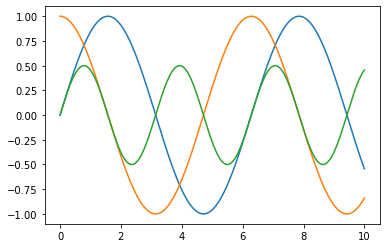

In [324]:
x = np.linspace(0,10,num=1000)
x2 = np.linspace(0,10,num=1000)

plt.plot(x,np.sin(x))
plt.plot(x2,np.cos(x2))

multiplied = np.sin(x)*np.cos(x2)
plt.plot(x,multiplied)

# Plotting math exercises

### 1.
plot the function:
$$y = \sin(x) - \cos(5\cdot log_2(x))$$
from $x=1$ and $x=40$

At the end your plot should look like this:
 
<img src='images/math_1.png' width=50%>

Hint: If yours doesn't look as a smooth as my plot try `plt.plot(x,y,'o-')` to figure out why.


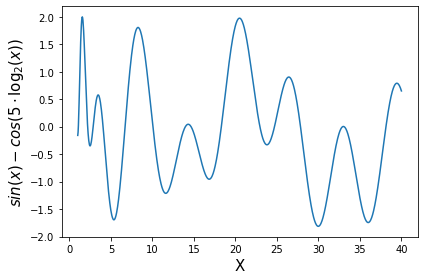

In [325]:
x = np.linspace(1,40,num=1000)
y = np.sin(x)-np.cos(5*np.log2(x))
plt.plot(x,y,)

plt.tight_layout()
plt.xlabel('X',fontsize=15)
plt.ylabel(r'$sin(x) - cos(5\cdot \log_2(x))$',fontsize=15)
plt.tight_layout()
plt.savefig('images/math_1.png')

### 2.
Plot  $ y(t) = e^{-at}$ for $t \in [0,1]$ for these values of $a$: [1, 5, 10]

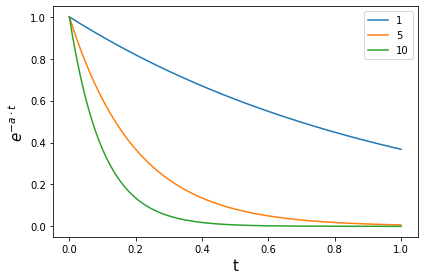

In [330]:
t = np.linspace(0,1,num=1000)
for a in [1, 5, 10]:
    y = np.exp(-a*t)
    plt.plot(t,y,label=a)

plt.tight_layout()
plt.xlabel('t',fontsize=15)
plt.ylabel(r'$e^{-a\cdot t}$',fontsize=15)
plt.tight_layout()
plt.legend()
plt.savefig('images/math_2.png')

###  3.
Plot a the first, fifth and tenth order Bessel functions of the first kind on the same plot from $x = 0$ to $x = 20$


<img src='images/math_3.png' width=40%>


Hint: Google, or look at [scipy.special](https://docs.scipy.org/doc/scipy/reference/special.html)

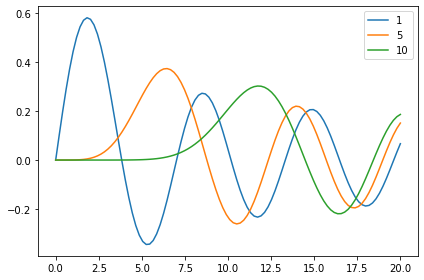

In [120]:
from scipy.special import jv

x = np.linspace(0,20,100)
for a in [1,5,10]:
    plt.plot(x,jv(a,x),label=a)
plt.legend()
plt.tight_layout()
plt.savefig('images/math_3.png')

### 4.
Plot a normalized gaussian (aka normal) distribution with mean ($\mu$) $=25$ and standard deviation ($\sigma$) $=2.5$. The normalization here means that it should be a valid probability distribution, i.e. the area under the curve is $1$.

<img src='images/math_4.png' width=40%>

Hint: Try googling "how to plot normalized 1d gaussian python"

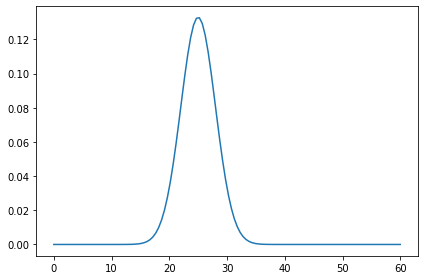

In [121]:

def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

x_values = np.linspace(0, 60, 120)
mu = 25
sigma = 2
plt.plot(x_values, gaussian(x_values, mu, sig))
plt.tight_layout()
plt.savefig('images/math_4.png')
plt.show()

### 5.

Let's do a very basic fit to some data. In the below cell I load two data sets for you. Figure out their means and standard deviations and use these to plot the gaussian that best matches the data. To plot this data you will need to make a histogram. I've plotted the first dataset for you. Feel free to play around with the arguments to see what they do

Hint: Try googling: "get mean and std numpy"

Don't worry about the fit to data2! We'll do a better job when we learn about indexing

In [147]:
arr = np.random.randn(10000)+5
np.save('data1',arr)
arr = np.concatenate([np.random.randn(5000)*2+9,np.random.randn(5000)*.5+2])
np.save('data2.npy',arr)
data1 = np.load('data1.npy')
data2 = np.load('data2.npy')

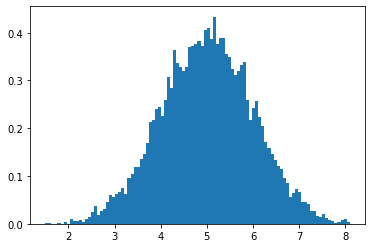

In [151]:
data1 = np.load('data1.npy')
data2 = np.load('data2.npy')

plt.hist(data1,density=True,bins=100)
plt.show()

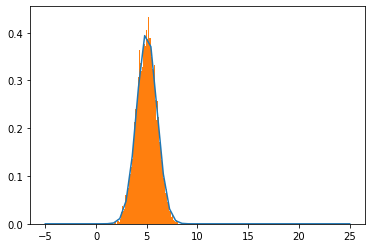

In [149]:
μ = np.mean(data1)
σ = np.std(data1)

plt.plot(x,gaussian(x,μ,σ))
plt.hist(data1,bins=100,density=True)
plt.show()

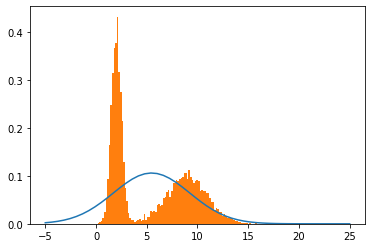

In [150]:
x = np.linspace(-5,25)

μ = np.mean(data2)
σ = np.std(data2)

plt.plot(x,gaussian(x,μ,σ))
plt.hist(data2,bins=100,density=True)
plt.savefig('images/math')
plt.show()

## More creating arrays

We can also make arrays from scratch rather than starting with a list. The most useful funcitons can be broken down into two main classes and are:

- Methods giving you specific numbers
    - [arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html#numpy.arange) Use this to generate lists of integers
    - [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace) use this to generate lists of evenly spaced numbers. For example to evaluate a function at many values between 0 and 1
    
- Methods where you give the shape of an array
    - [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html#numpy.zeros) give an array of zeros in the shape you specify
    - [zeros_like](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html#numpy.zeros_like) gives an array of zeros in the shape of anther array
    - [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones_like.html#numpy.ones) same as zeros except filled with ones
    - [ones_like](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones_like.html#numpy.ones_like) sames as zeros_like except filled with ones


### Shape and Reshaping

Arrays have a property called shape that is a generalization to many dimensions of the length of a list.


Calls each dimension an axis


<img src="https://i.stack.imgur.com/gj5ue.jpg" >


image from: https://stackoverflow.com/a/52491249/835607

In [105]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [106]:
arr = np.arange(6).reshape(2,3)
arr

array([[0, 1, 2],
       [3, 4, 5]])

In [435]:
np.zeros((10,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [108]:
arr.ravel()

array([0, 1, 2, 3, 4, 5])

In [109]:
arr.flatten()

array([0, 1, 2, 3, 4, 5])

In [116]:
arr = np.arange(6).reshape(2,3)
print(arr)


[[0 1 2]
 [3 4 5]]


In [119]:
flattened = arr.flatten()
flattened += 3
print(arr)

[[3 4 5]
 [6 7 8]]


In [120]:

ravelled = arr.ravel()
ravelled += 3
print(arr)


[[ 6  7  8]
 [ 9 10 11]]


## Exercises

### 1.
sort each row of the array in the cell below

Hint: look at the axis argument of `np.sort`

In [439]:
np.random.randint(0,10,size=5*10).reshape(10,5)
arr = np.array([[6, 3, 8, 6, 1],
               [2, 2, 0, 8, 4],
               [0, 3, 7, 3, 0],
               [2, 4, 2, 6, 2],
               [6, 6, 8, 8, 1],
               [5, 5, 7, 9, 3],
               [1, 1, 5, 2, 5],
               [6, 7, 1, 0, 1],
               [9, 7, 0, 2, 7],
               [9, 7, 8, 6, 5]])
np.sort(arr,axis=1)

array([[1, 3, 6, 6, 8],
       [0, 2, 2, 4, 8],
       [0, 0, 3, 3, 7],
       [2, 2, 2, 4, 6],
       [1, 6, 6, 8, 8],
       [3, 5, 5, 7, 9],
       [1, 1, 2, 5, 5],
       [0, 1, 1, 6, 7],
       [0, 2, 7, 7, 9],
       [5, 6, 7, 8, 9]])

## Indexing

Comprehensive reference (also fairly readable): https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html   
https://docs.scipy.org/doc/numpy/user/basics.indexing.html  
https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html#Array-Slicing:-Accessing-Subarrays  
https://jakevdp.github.io/PythonDataScienceHandbook/02.07-fancy-indexing.html  

#### Selecting specific elements

In [441]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [442]:
arr[2]

2

In [443]:
arr[-1]

9

In [444]:
arr[-2]

8

####  Selecting ranges of elements

In [445]:
arr[2:]

array([2, 3, 4, 5, 6, 7, 8, 9])

In [446]:
arr[2:5]

array([2, 3, 4])

In [447]:
arr[-2:]

array([8, 9])

In [448]:
arr[:-2]

array([0, 1, 2, 3, 4, 5, 6, 7])

In [449]:
arr[[0,2,4,6]]

array([0, 2, 4, 6])

#### Multidimensional selections

In [270]:
arr2 = np.arange(16).reshape(4,4)
arr2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [452]:
arr2[[0,2,1]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [ 4,  5,  6,  7]])

In [453]:
arr2[0,1]

1

In [454]:
arr2[[0,1],[0,1]]

array([0, 5])

In [271]:
arr2[:,0]

array([ 0,  4,  8, 12])

In [273]:
arr2[0,:]

array([0, 1, 2, 3])

In [274]:
arr2[:,0,:]

IndexError: too many indices for array

In [275]:
arr2[:,1:]

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15]])

In [276]:
arr2[1:-1,1:-1]

array([[ 5,  6],
       [ 9, 10]])

#### Sorting two arrays in parallel

In [462]:
N = 5
arr1 = np.random.randint(0,high=10,size=N)
arr2 = np.arange(N)
print(arr1)
print(arr2)
idx = np.argsort(arr1)
print('---')
print(arr1[idx])
print(arr2[idx])

[9 7 5 9 7]
[0 1 2 3 4]
---
[5 7 7 9 9]
[2 1 4 0 3]


## Basic indexing exercise 

using `np.random.randint` select and plot 10 random points from the below array y and plot them. An even more convenient way to do this would be to use `np.random.choice`

You should end up with an image that looks like this (Though the subsampled points may be different):

<img src='images/indexing_subsample.png' width=40%>

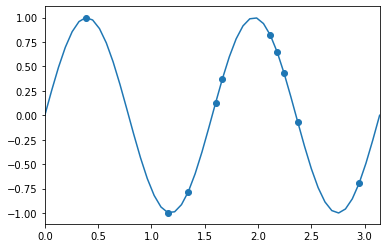

In [298]:
x = np.linspace(0,np.pi,num=50)
y = np.sin(x*4)
plt.plot(x,y)

idx = np.random.randint(0,len(x),size=10)
plt.scatter(x[idx],y[idx])
plt.xlim([0,np.pi])
plt.plot(x,y)
plt.savefig('images/indexing_subsample.png')

### Boolean indexing (aka fancy indexing)

In [303]:
arr = np.random.randint(0,10,size=50)
arr = np.sort(arr)
arr

array([0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8,
       8, 8, 8, 9, 9, 9])

In [304]:
arr>3

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [307]:
idx = arr>4

# how many are true?
print(np.sum(idx))
arr[idx]

26


array([5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8,
       8, 9, 9, 9])

In [310]:
~idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

### Selecting points that are >0


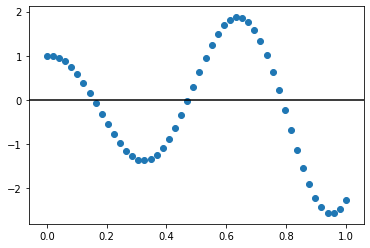

In [302]:
x = np.linspace(0,1)
y = np.exp(x)*np.cos(x*10) 
plt.scatter(x,y)
plt.axhline(0,color='k')

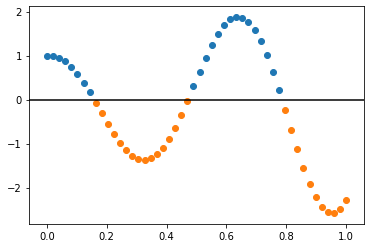

In [256]:
# selecting data above 0
idx = y > 0

plt.scatter(x[idx],y[idx],label='positive')
plt.scatter(x[~idx],y[~idx],label='negative')
plt.axhline(0,color='k')

## Indexing Exercises

### 1.

Find the lowest point of 
$$y = \sin(x) - \cos(5\cdot log_2(x))$$ (same equation as the math exercises)
between $x=1$ and $x=40$. Then using`plt.axhline` and `plt.axvline` produce this plot:

<img src='images/indexing_func_min.png' width=40%>

Look at the functions: `np.argmin`, `np.argmax` and `np.argsort`

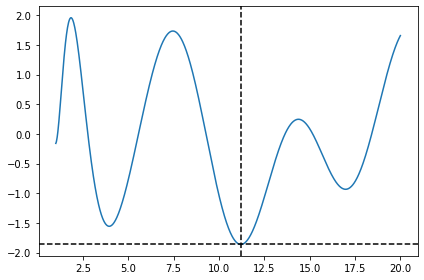

In [455]:
num_points = 1000
x = np.linspace(1,20,num=num_points)
y = np.sin(x)-np.cos(5*np.log(x))
plt.plot(x,y)

idx = np.argmin(y)

plt.axvline(x[idx],color='k',linestyle='--')
plt.axhline(y[idx],color='k',linestyle='--')
plt.tight_layout()
plt.savefig('images/indexing_func_min.png')

### 2. Fitting multiple peaks

Using indexing fit two gaussians to data2 from earlier.

Final plot should look like:

<img src='images/indexing_two_peak.png' width=40%>

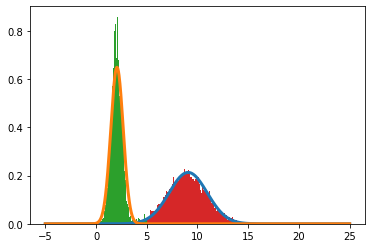

In [381]:
x = np.linspace(-5,25,num=1000)
threshold = 5
idx = data2>threshold
μ = np.mean(data2[idx])
σ = np.std(data2[idx])
plt.plot(x,gaussian(x,μ,σ),linewidth=3)

μ = np.mean(data2[~idx])
σ = np.std(data2[~idx])

plt.plot(x,gaussian(x,μ,σ),linewidth=3)

plt.hist(data2[~idx],bins=100,density=True)
plt.hist(data2[idx],bins=100,density=True)

plt.savefig('images/indexing_two_peak.png')
plt.show()

## 3. More advanced indexing

Don't worry if you don't finish this one. It's trickier

Find the second lowest valley in $y = \sin(x) - \cos(5\cdot log_2(x))$

<img src='images/indexing_second_lowest.png' width=40%>



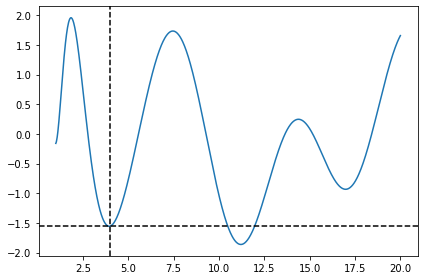

In [382]:
num_points = 1000
x = np.linspace(1,20,num=num_points)#+(np.random.randn(num_points)*.05)
y = np.sin(x)-np.cos(5*np.log(x))
plt.plot(x,y)
# y = np.sin(x)-np.log(x)
# plt.plot(x,y)

x_idx = (x<6) & (x>4)
idx = np.argmin(y[x_idx])

plt.axvline(x[x_idx][idx],color='k',linestyle='--')
plt.axhline(y[x_idx][idx],color='k',linestyle='--')
plt.tight_layout()
plt.savefig('images/indexing_second_lowest.png')

## End of exercises - If you're done help someone near you

## Broadcasting

[Broadcasting rules](https://docs.scipy.org/doc/numpy/user/quickstart.html#broadcasting-rules)  
https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html  

In [396]:
a = np.array([[1,1],
              [2,2],
              [3,3]])

a * 5

array([[ 5,  5],
       [10, 10],
       [15, 15]])

In [397]:
print(a.shape)
print(b.shape)
b = np.array([2,3])
a*b

(3, 2)
(2,)


array([[2, 3],
       [4, 6],
       [6, 9]])

In [398]:
a*b[None,:]

array([[2, 3],
       [4, 6],
       [6, 9]])

In [399]:
b[None,:].shape

(1, 2)

In [401]:
c = np.array([1,2,3])
print(a)
print(a/c[:,None])

[[1 1]
 [2 2]
 [3 3]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]


In [357]:
b = np.arange(6).reshape(a.shape)
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [356]:
print(a.shape)
print(b.shape)
a*b


(3, 2)
(3, 2)


array([[ 0,  1],
       [ 4,  6],
       [12, 15]])

In [395]:
b

array([2, 3])

#### sort an array based on a column

In [466]:
arr = np.random.randint(0,high=10,size=50).reshape(5,10)
arr
idx = np.argsort(arr[:,4],)
arr[idx]

array([[5, 8, 7, 0, 0, 7, 7, 2, 0, 2],
       [1, 5, 4, 6, 0, 5, 0, 7, 6, 7],
       [1, 5, 3, 8, 3, 5, 5, 1, 2, 8],
       [3, 8, 2, 9, 8, 4, 7, 1, 3, 9],
       [0, 3, 9, 6, 9, 6, 1, 1, 0, 6]])

#### Doing math exercise 2 with broadcasting
Plot  $ y(t) = e^{-at}$ for $t \in [0,1]$ for these values of $a$: [1, 5, 10]

In [387]:
t = np.linspace(0,1,num=1000)
# for a in [1, 5, 10]:
#     y = np.exp(-a*t)
#     plt.plot(t,y,label=a)

a = np.array([1,5,10])
y = np.exp(-a*t)
y = np.exp(-a[:,None]*t)

plt.plot(y.T)

ValueError: operands could not be broadcast together with shapes (3,) (1000,) 

## Broadcasting exercises

### 1. Row wise standardization
For each row in the below array subtract the mean of the row and then divide by the standard deviation. You can\ do this using the axis argument in `np.mean` and `np.std`. If you have done this correctly and named the resulting array `standardized` then `np.sum(np.abs(standardized))` should return 31.83...

In [341]:
arr = np.zeros((4,10),dtype=np.int)
for i,high in enumerate([10,50,100,150]):
    arr[i] = np.random.randint(0,high,10)
arr

array([[  3,   2,   2,   5,   8,   0,   1,   3,   7,   5],
       [ 41,  26,  42,  24,  29,  38,   7,   5,  11,  37],
       [ 65,  13,  82,  13,  80,  84,  88,  16,  46,  15],
       [ 66, 115,  24,  17, 108,  35,  90,  88,  28,  96]])

In [342]:
arr = np.array([[  4,   4,   3,   5,   3,   9,   3,   6,   5,   5],
                [ 21,  35,  36,  30,   4,  44,   7,  28,  30,  33],
                [ 23,  51,  56,  64,  88,  60,   8,  65,  83,  56],
                [  5, 126,  65,   7, 146,  54, 147, 121, 107, 139]])

In [351]:
standardized = (arr - arr.mean(axis=1,keepdims=True))/arr.std(axis=1,keepdims=True)
np.sum(np.abs(standardized))

31.83687488266142

### 2. Creating a datacube

create a 3D array that contains every value of $Bessel_1(x) + cos(40 \cdot y) + sin(10 \cdot z)$
for:  
``` 
x = np.linspace(0,10)
y = np.linspace(0,1)
z = np.linspace(25,75)
```


Then plot 2d slices using `plt.imshow`. If take the zeroth slice you should get the following three plots:

<img src='images/cube_1.png' width=30%><img src='images/cube_2.png' width=30%><img src='images/cube_3.png' width=30%>


Hint 1: You will need to use `np.newaxis`(or `None`) in your indexing
Hint 2: Don't try to do it all at once! Build it in parts and check the shape of the output at each step

In [244]:
N = 1000
x = np.linspace(0,10,num=N)
y = np.linspace(0,1,num=N)
z = np.linspace(25,75,num=N)


out = jv(1,x)[:,None,None] + np.cos(40*y[None,:,None])+ np.sin(z*10)[None,None,:]
out.shape

(1000, 1000, 1000)

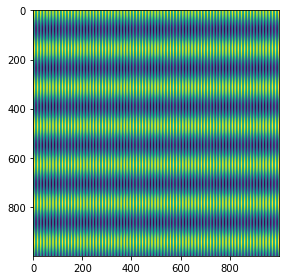

In [368]:
plt.imshow(out[0,:,:])
plt.tight_layout()
plt.savefig('images/cube_1.png')

In [ ]:
np.random.randint()

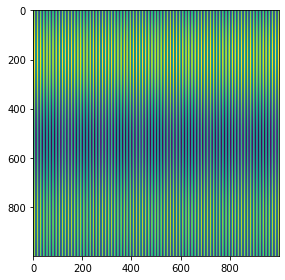

In [369]:
plt.imshow(out[:,0,:])
plt.tight_layout()
plt.savefig('images/cube_2.png')

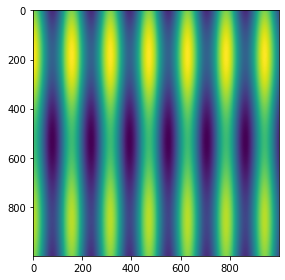

In [370]:
plt.imshow(out[...,0])
plt.tight_layout()
plt.savefig('images/cube_3.png')

### 3. Diagonal indices

Plot the values of the diagonal of the datacube

<img src='images/cube_4.png'>
Hint: First step should be googling how to do this



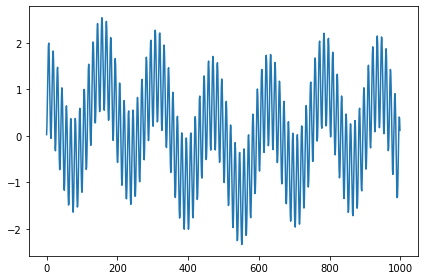

In [367]:
idx = np.diag_indices_from(out)

plt.plot(out[idx])
plt.tight_layout()
plt.savefig('images/cube_4.png')

## End of exercises - if you're done help someone else

# Application Random Walks

What are random walks? https://www.mit.edu/~kardar/teaching/projects/chemotaxis(AndreaSchmidt)/random.htm

#### Bernoulli random walk

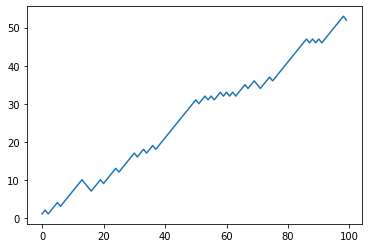

In [469]:
rng = np.random.default_rng()
steps = rng.choice([-1,1],size=100,p=[.25,.75])
np.sum(steps)
np.cumsum(steps)
positions = np.cumsum(steps)
plt.plot(positions)

easy but ineffcient way to simulate many is to use a for loop. In exercises you'll do this with a `reshape` command

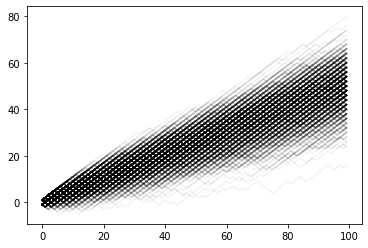

In [470]:
num_walkers = 1000
for i in range(num_walkers):
    steps = np.random.choice([-1,1],size=100,p=[.25,.75])
    positions = np.cumsum(steps)
    plt.plot(positions,'k',alpha=.05)

#### Random walk with normally distributed steps

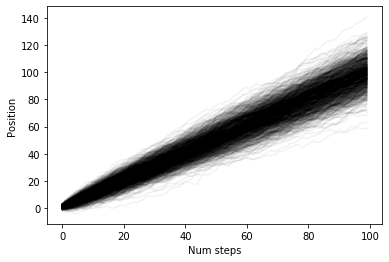

In [472]:
num_walkers = 1000
num_steps = 100
for i in range(num_walkers):
    steps = rng.standard_normal(size=num_steps)+1
    positions = np.cumsum(steps)
    plt.plot(positions,'k',alpha=.05)
plt.xlabel('Num steps')
plt.ylabel('Position')
plt.show()

## Exercises

## 1.

Repeat the second example from above but without a for loop.

Hint: Make the size argument larger (how much?) and use reshape then use the axis argument to cumsum


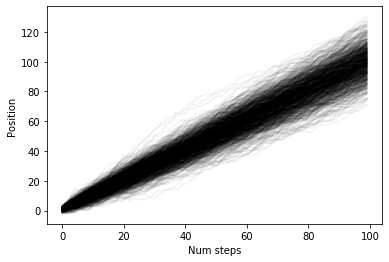

In [474]:
num_walkers = 1000
num_steps = 100
steps = rng.standard_normal(size=num_steps*num_walkers).reshape(num_walkers,num_steps)+1
positions = np.cumsum(steps,axis=1)
plt.plot(positions.T,'k',alpha=.05)
plt.xlabel('Num steps')
plt.ylabel('Position')
plt.show()

### 2.

Plot the mean as one line and two lines that are +/- the std deviation of walker positions as function of time

<img src='images/random_walk_with_mean.png' width=40%>


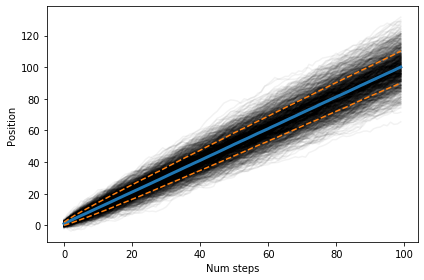

In [476]:
num_walkers = 1000
num_steps = 100
steps = rng.standard_normal(size=num_steps*num_walkers).reshape(num_steps,num_walkers)+1
positions = np.cumsum(steps,axis=0)

mean = np.mean(positions,axis=1)
std = np.std(positions,axis=1)

plt.plot(positions,'k',alpha=.05)
plt.plot(mean,color='tab:blue',linewidth=3)
plt.plot(mean-std,'--',color='tab:orange')
plt.plot(mean+std,'--',color='tab:orange')
plt.xlabel('Num steps')
plt.ylabel('Position')
plt.tight_layout()
plt.savefig('images/random_walk_with_mean.png')

## 3. 2D random walks
plot many 2D random walkers (normally distributed steps) and using `argsort` highlight both the walkers that ended 1. farthest from the origin and 2. closest to it

<img src='images/2d_walk.png' width=50%>

Hint: Your `steps` array should have shape (time_steps, walkers, 2)

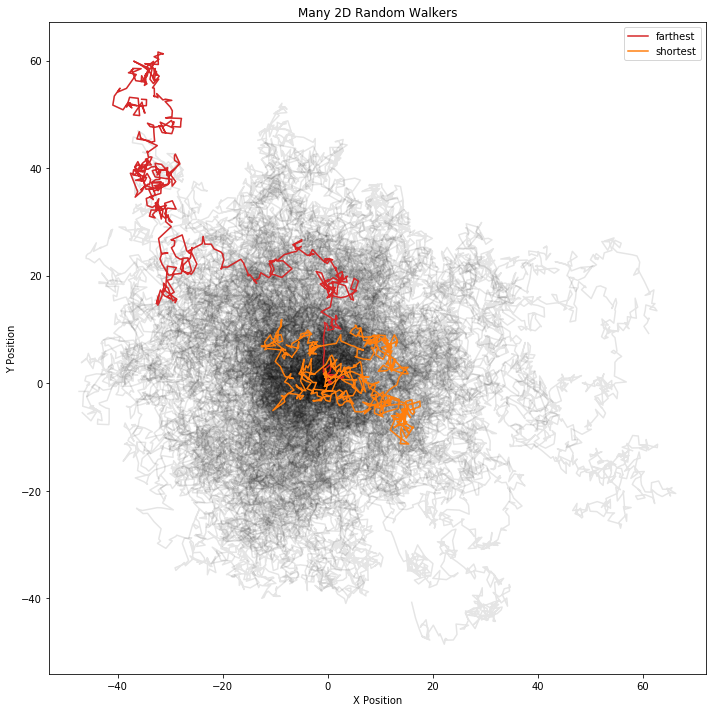

In [478]:
plt.figure(figsize=(10,10))
num_time_steps = 500
num_walkers = 100
steps = rng.standard_normal(size=num_time_steps*num_walkers*2).reshape(num_time_steps,num_walkers,2)

walkers = steps.cumsum(axis=0) # has shape [time, walker, x/y]
plt.plot(walkers[:,:,0],walkers[:,:,1],alpha=.1,color='k')


distances = np.sum(np.sqrt(walkers[-1,:,:]**2),axis=1)
sorted_order = np.argsort(distances)

#find farthest walker
farthest = walkers[:,sorted_order[-1],:]
plt.plot(farthest[:,0],farthest[:,1],alpha=1,color='tab:red',label='farthest')

#find shortest
shortest = walkers[:,sorted_order[0],:]
plt.plot(shortest[:,0],shortest[:,1],alpha=1,color='tab:orange',label='shortest')

plt.legend()
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Many 2D Random Walkers')
plt.tight_layout()
plt.savefig('images/2d_walk.png',dpi=100)